In [0]:
from fastai.vision import *

In [0]:
path=untar_data(URLs.MNIST)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [0]:
il=ImageList.from_folder(path, convert_mode='L')

In [0]:
defaults.cmap='binary'

In [0]:
type(il)

fastai.vision.data.ImageList

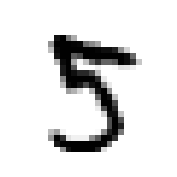

In [0]:
il[5000].show()

In [0]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png

In [0]:
il.items

array([PosixPath('/root/.fastai/data/mnist_png/testing/1/9435.png'),
       PosixPath('/root/.fastai/data/mnist_png/testing/1/89.png'),
       PosixPath('/root/.fastai/data/mnist_png/testing/1/716.png'),
       PosixPath('/root/.fastai/data/mnist_png/testing/1/3351.png'), ...,
       PosixPath('/root/.fastai/data/mnist_png/training/8/22849.png'),
       PosixPath('/root/.fastai/data/mnist_png/training/8/32076.png'),
       PosixPath('/root/.fastai/data/mnist_png/training/8/57640.png'),
       PosixPath('/root/.fastai/data/mnist_png/training/8/23817.png')], dtype=object)

In [0]:
sd=il.split_by_folder(train='training', valid='testing')

In [0]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
(path/'training').ls()

[PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/7'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/8')]

In [0]:
ll=sd.label_from_folder()

In [0]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
1,1,1,1,1
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
1,1,1,1,1
Path: /root/.fastai/data/mnist_png;

Test: None

In [0]:
x,y=ll.train[0]

(Image (1, 28, 28), Category 1)

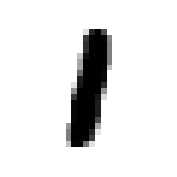

In [0]:
x.show(size=(6,6))
x,y

In [0]:
tfms=get_transforms(do_flip=False)
#tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [0]:
ll=ll.transform(tfms, size=28,padding_mode='zeros')

In [0]:
?get_transforms

In [0]:
??get_transforms

In [0]:
doc(get_transforms)

In [0]:
help(get_transforms)

In [0]:
x,y=ll.train[0]

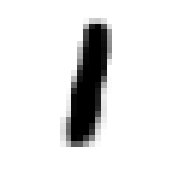

In [0]:
x.show()

In [0]:
data=ll.databunch(bs=128).normalize()

In [0]:

#data=(ImageList.from_folder(path, convert_mode='L')
#.split_by_folder(train='training', valid='testing')
#.label_from_folder()
#.transform(tfms,size=28)
#.databunch(bs=128)
#.normalize())

In [0]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

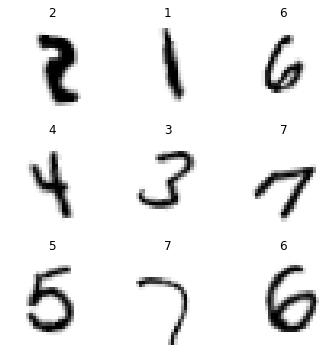

In [0]:
data.show_batch(rows=3,figsize=(5,5))

In [0]:
def conv2d(ni,nf):
  return nn.Conv2d(ni,nf,stride=2, kernel_size=3, padding=1)

In [0]:
model = nn.Sequential(
    conv2d(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv2d(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv2d(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv2d(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv2d(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [0]:
xb = xb.cuda()

In [0]:
model(xb).shape

torch.Size([128, 10])

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


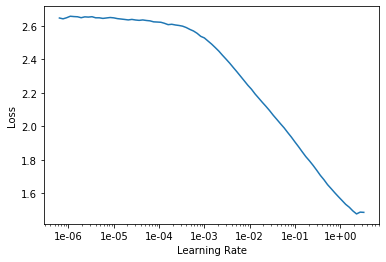

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.184363,0.124221,0.961100,01:18
1,0.120473,0.071823,0.977700,01:16
2,0.064769,0.031561,0.990300,01:15


In [0]:
learn.save('conv');

In [0]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [0]:
model = nn.Sequential(
    conv2d(1, 8),
    ResBlock(8),
    conv2d(8, 16),
    ResBlock(16),
    conv2d(16, 32),
    ResBlock(32),
    conv2d(32, 16),
    ResBlock(16),
    conv2d(16, 10),
    Flatten()
)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [0]:
learn.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


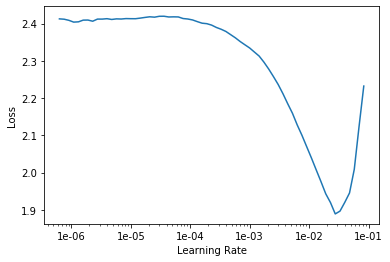

In [0]:
learn.recorder.plot()

In [0]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
___________________________________________________

In [0]:
learn.fit_one_cycle(3,max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.200060,0.112164,0.967000,01:17
1,0.092787,0.043498,0.985600,01:18
2,0.040886,0.021115,0.992200,01:18


In [0]:
learn.save('resnet');

In [0]:
interpret=ClassificationInterpretation.from_learner(learn)

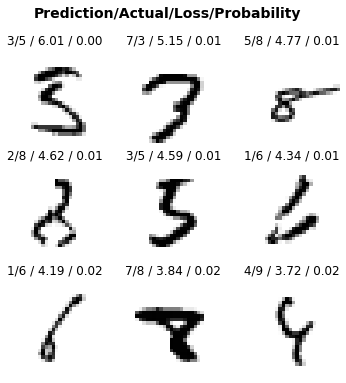

In [0]:
interpret.plot_top_losses(9,figsize=(6,6))

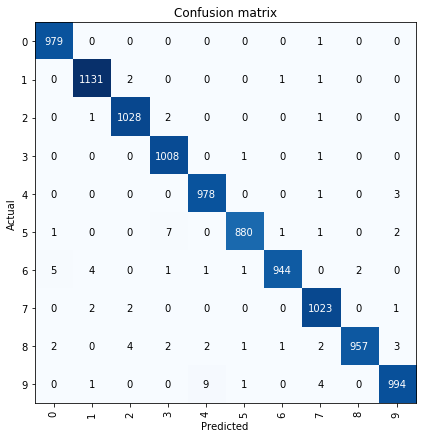

In [0]:
interpret.plot_confusion_matrix(figsize=(6,6))

In [0]:
learn.export('mnist.pkl')